In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# citipy to determine city's latitude and longitude
from citipy import citipy

# Output File (CSV)
data_file = "../output_data/cities.csv"

# Range for latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [3]:
# List for holding cities and lat&lng:
lat_lngs=[]
cities=[]

# Create random lat/long combination:
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)

# Identify nearest city for each lat, lng combination:
for lat_lng in lat_lngs:
    city=citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# Add the unique city to the cities list:
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient amount:
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'

query_url=f'{url}appid={weather_api_key}&units={units}&q='

In [5]:
# set list to hold response:
name=[]         
cloud=[]        
ctry=[]        
date=[]         
humi=[]         
lat=[]          
lng=[]          
maxtemp=[]      
wind=[]         
count=1

print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                               
            name.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humi.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            
            print(city + ' city not found. Skipping...')    
        count=count+1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 637 | isabela
Processing Record 2 of 637 | lebu
Processing Record 3 of 637 | belushya guba
belushya guba city not found. Skipping...
Processing Record 4 of 637 | hermanus
Processing Record 5 of 637 | jamestown
Processing Record 6 of 637 | kodiak
Processing Record 7 of 637 | punta arenas
Processing Record 8 of 637 | victoria
Processing Record 9 of 637 | kishi
Processing Record 10 of 637 | tambacounda
Processing Record 11 of 637 | asau
Processing Record 12 of 637 | princeton
Processing Record 13 of 637 | kilindoni
Processing Record 14 of 637 | nguiu
nguiu city not found. Skipping...
Processing Record 15 of 637 | zhigansk
Processing Record 16 of 637 | salalah
Processing Record 17 of 637 | san patricio
Processing Record 18 of 637 | razole
Processing Record 19 of 637 | talara
Processing Record 20 of 637 | bluff
Processing Record 21 of 637 | mahebourg
Processing Record 22 of 637 | tabou
Processing Record 23 of 637 

Processing Record 191 of 637 | sao gabriel da cachoeira
Processing Record 192 of 637 | pochutla
Processing Record 193 of 637 | sao felix do xingu
Processing Record 194 of 637 | bosaso
Processing Record 195 of 637 | yinchuan
Processing Record 196 of 637 | broken hill
Processing Record 197 of 637 | sobolevo
Processing Record 198 of 637 | berlevag
Processing Record 199 of 637 | aksarka
Processing Record 200 of 637 | luderitz
Processing Record 201 of 637 | klaksvik
Processing Record 202 of 637 | lagoa
Processing Record 203 of 637 | ontario
Processing Record 204 of 637 | nishihara
Processing Record 205 of 637 | kismayo
Processing Record 206 of 637 | yulara
Processing Record 207 of 637 | jepara
Processing Record 208 of 637 | raudeberg
Processing Record 209 of 637 | sulphur springs
Processing Record 210 of 637 | addis zemen
addis zemen city not found. Skipping...
Processing Record 211 of 637 | codrington
Processing Record 212 of 637 | parthenay
Processing Record 213 of 637 | barrow
Processing

Processing Record 379 of 637 | karpathos
Processing Record 380 of 637 | muravlenko
Processing Record 381 of 637 | borodino
Processing Record 382 of 637 | tianpeng
Processing Record 383 of 637 | paraisopolis
Processing Record 384 of 637 | quatre cocos
Processing Record 385 of 637 | bud
Processing Record 386 of 637 | yining
Processing Record 387 of 637 | guerrero negro
Processing Record 388 of 637 | kerema
Processing Record 389 of 637 | tamale
Processing Record 390 of 637 | dongsheng
Processing Record 391 of 637 | agfalva
Processing Record 392 of 637 | searcy
Processing Record 393 of 637 | meulaboh
Processing Record 394 of 637 | greenville
Processing Record 395 of 637 | bykovo
Processing Record 396 of 637 | sotnikovo
Processing Record 397 of 637 | tura
Processing Record 398 of 637 | lapi
Processing Record 399 of 637 | rio gallegos
Processing Record 400 of 637 | mitu
Processing Record 401 of 637 | carnarvon
Processing Record 402 of 637 | skjervoy
Processing Record 403 of 637 | richard tol

Processing Record 573 of 637 | lamas
Processing Record 574 of 637 | yaan
Processing Record 575 of 637 | mahibadhoo
Processing Record 576 of 637 | waddan
Processing Record 577 of 637 | fukuma
Processing Record 578 of 637 | kjollefjord
Processing Record 579 of 637 | bubaque
Processing Record 580 of 637 | santa rosa
Processing Record 581 of 637 | charters towers
Processing Record 582 of 637 | pozhva
Processing Record 583 of 637 | ende
Processing Record 584 of 637 | frontera
Processing Record 585 of 637 | snasa
Processing Record 586 of 637 | robertsport
Processing Record 587 of 637 | galgani
galgani city not found. Skipping...
Processing Record 588 of 637 | viedma
Processing Record 589 of 637 | sigli
Processing Record 590 of 637 | abapo
Processing Record 591 of 637 | ishigaki
Processing Record 592 of 637 | vanimo
Processing Record 593 of 637 | stornoway
Processing Record 594 of 637 | tokur
Processing Record 595 of 637 | kushima
Processing Record 596 of 637 | burgeo
Processing Record 597 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a data frame from api call list:
weather_dict = {'City': name,
'Country': ctry,
'Date': date,
'Lat': lat,
'Lng': lng,
'Cloudiness (%)': cloud,
'Humidity (%)': humi,
'Max Temp (F)': maxtemp,
'Wind Speed (mph)': wind
}

weather_data=pd.DataFrame(weather_dict)

weather_data.isnull().sum()
weather_data.dropna() 
weather_data.count()

City                591
Country             591
Date                591
Lat                 591
Lng                 591
Cloudiness (%)      591
Humidity (%)        591
Max Temp (F)        591
Wind Speed (mph)    591
dtype: int64

In [7]:
# save city into csv file
weather_data.to_csv(data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\Users\heung\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


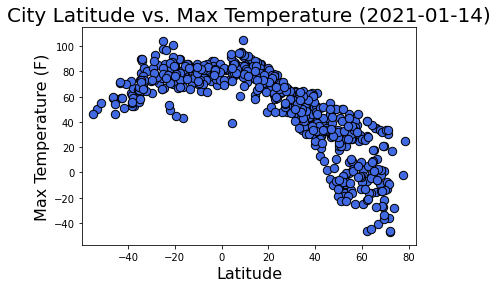

In [8]:
# create latitude vs temperature scatter plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp (F)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Add the graph properties:
plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

#set limit for x and y axis
plt.ylim(min(weather_data['Max Temp (F)'])-10, max(weather_data['Max Temp (F)'])+10)
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Max Temperature.png')

# Show plot:
plt.show()

The highest temperature found in -20 latitude. Temperature decrease when latitude increase

## Latitude vs. Humidity Plot

C:\Users\heung\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


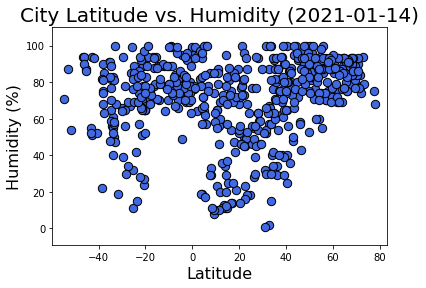

In [9]:
# create scatter plot for latitude vs humidity plot:
plt.scatter(weather_data['Lat'], weather_data['Humidity (%)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# add the graph properties
plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

#set limit for x and y axis:
plt.ylim(min(weather_data['Humidity (%)'])-10, max(weather_data['Humidity (%)'])+10)
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Humidity.png')

# Show plot:
plt.show()

Most of the cities's himidity increase along with the increase latitude

## Latitude vs. Cloudiness Plot

C:\Users\heung\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


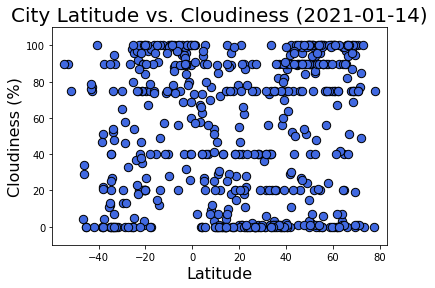

In [10]:
# create scatter plot for latitude vs cloudnisness 
plt.scatter(weather_data['Lat'], weather_data['Cloudiness (%)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# add the graph properties
plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

#set limit for x and y axis:
plt.ylim(min(weather_data['Cloudiness (%)'])-10, max(weather_data['Cloudiness (%)'])+10)
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure
plt.savefig('../output_data/City Latitude vs. Cloudiness.png')

# Show plot
plt.show()

most of the cities are either extremely cloudiness or near zero cloudiness, there are few cities with median cloudiness

## Latitude vs. Wind Speed Plot

C:\Users\heung\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


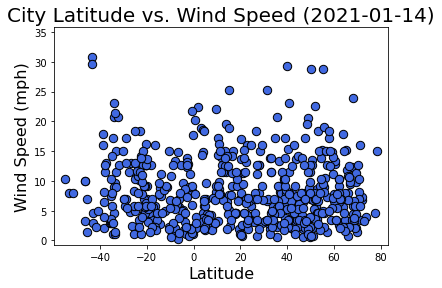

In [11]:
# create scatter plot for latitude vs wind speed plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed (mph)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# add the graph properties
plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

#set limit for x and y axis:
plt.ylim(min(weather_data['Wind Speed (mph)'])-1, max(weather_data['Wind Speed (mph)'])+5)
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure
plt.savefig('../output_data/City Latitude vs. Wind Speed.png')

# Show plot
plt.show()

Most of the data of city Latitude vs wind speed are concentrated in between wind speed (%) 0 to 20 along with the laitude increased from -60 to 80. 

## Linear Regression

In [12]:
# Create dataframe for nothern hemisphere and southern hemisphere
northern_hemisphere = weather_data[weather_data['Lat'] >= 0]
southern_hemisphere = weather_data[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.75


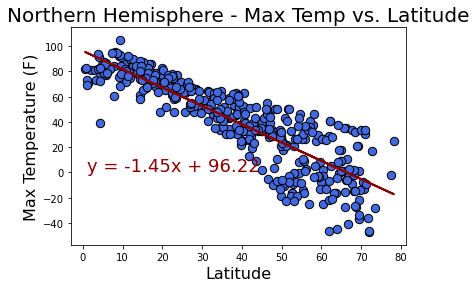

In [13]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp (F)']

# linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regression values:
regress_values = x_values * slope + intercept

# line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Add graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')

#set limit for x and y axis:
plt.ylim(min(weather_data['Max Temp (F)'])-10, max(weather_data['Max Temp (F)'])+10)
plt.xlim(-3, max(weather_data['Lat'])+3)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Max Temm in northern hemisphere.png')

# Show plot:
plt.show()

There is a negative correlation between max temperature and latitude for northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.24


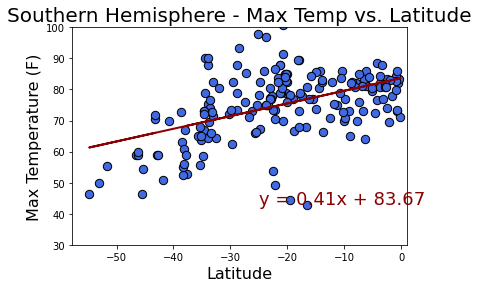

In [14]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp (F)']

# linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regression values:
regress_values = x_values * slope + intercept

# line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# add graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-25,43),fontsize=18, color='darkred')

#set limit for x and y axis:
plt.ylim(30, 100)
plt.xlim(min(weather_data['Lat'])-3, +1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Max Temp in Southern hemisphere.png')

# Show plot:
plt.show()

There is a postive correlation bettwen max temperature and latitude for southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21


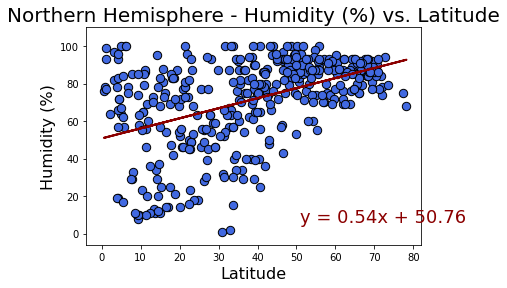

In [15]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity (%)']

# linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regression values:
regress_values = x_values * slope + intercept

# line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# add graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')

#set limit for x and y axis:
plt.ylim(-6, 110)
plt.xlim(-4, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Humidity in Northern hemisphere.png')

# Show plot:
plt.show()

There is a positive correlation between humidity and latitude for northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05


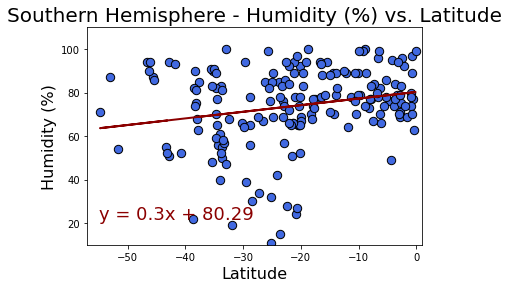

In [16]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity (%)']

# linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regression values:
regress_values = x_values * slope + intercept

# line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# add graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,22), fontsize=18, color='darkred')

#set limit for x and y axis:
plt.ylim(10, 110)
plt.xlim(-57, 1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Humidity in Southern hemisphere.png')

# Show plot:
plt.show()

There is a positive correlation bettwen humidity and latitude for southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08


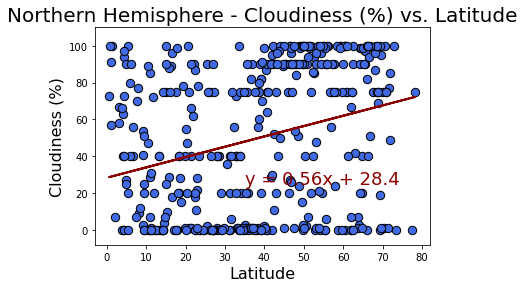

In [17]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness (%)']

# linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regression values:
regress_values = x_values * slope + intercept

# line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Add graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')

#set limit for x and y axis:
plt.ylim(-8, 110)
plt.xlim(-3, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Cloudiness in Northern hemisphere.png')

# Show plot:
plt.show()

The data is widely spread but it shown a positive correlation in between cloudiness and latitude for northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19


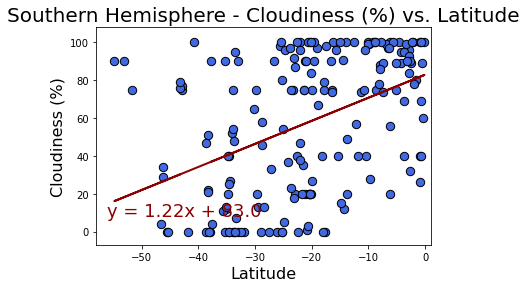

In [18]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness (%)']

# linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regression values:
regress_values = x_values * slope + intercept

# line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# add graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')

#set limit for x and y axis:
plt.ylim(-7, 108)
plt.xlim(-58, 1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Cloudiness in Southern hemisphere.png')

# Show plot:
plt.show()

The data is widely spread but it shown a positive relationship in between cloudiness and latitude for southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0


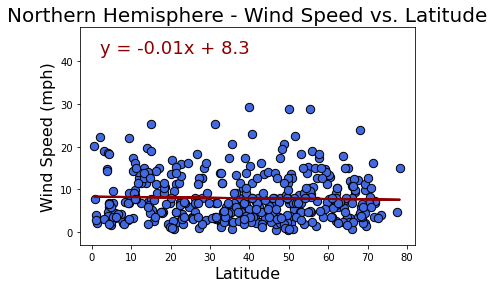

In [20]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed (mph)']

# linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regression values:
regress_values = x_values * slope + intercept

# line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Add graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='darkred')

#set limit for x and y axis:
plt.ylim(-3, 48)
plt.xlim(-3, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Wind in Northern hemisphere.png')

# Show plot:
plt.show()

There is a slightly positive correlation bettwen wind speed and latitude in northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04


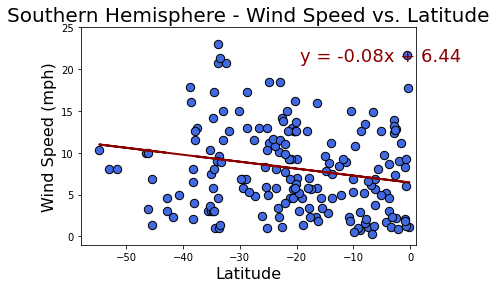

In [21]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed (mph)']

# linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regression values:
regress_values = x_values * slope + intercept

# line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Add graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')

#set limit for x and y axis:
plt.ylim(-1, 25)
plt.xlim(-58, 1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Wind in Southern hemisphere.png')

# Show plot:
plt.show()

There is a slightly negative correlation between wind speed and latitude in southern hemisphere